In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import uproot

In [2]:
f = uproot.open("user.cantel.19806744.BTAGSTREAM._000001.root")

In [3]:
to_read = [
    b'HSx', b'HSy', b'HSz', b'PVx', b'PVy', b'PVz',
    b'AK4EM_jet_pt', b'AK4EM_jet_eta', b'AK4EM_jet_phi', b'AK4EM_jet_E',
    b'AK4EM_jet_truthMatch', b'AK4EM_jet_quarkMatch', b'AK4EM_jet_truthflavExCHad',
    b'AK4EM_IP3D_jet_ipxd_pc', b'AK4EM_IP3D_jet_ipxd_pu', b'AK4EM_IP3D_jet_ipxd_llr', 
    b'AK4EM_IP3D_jet_ipxd_ntrk', 
    b'AK4EM_IP3D_jet_ipxd_trackAssoc_index', 
    b'AK4EM_IP3D_jet_ipxd_gradeOfTracks', 
    b'AK4EM_IP3D_jet_ipxd_flagFromV0ofTracks', 
    b'AK4EM_IP3D_jet_ipxd_valD0wrtPVofTracks', 
    b'AK4EM_IP3D_jet_ipxd_sigD0wrtPVofTracks', 
    b'AK4EM_IP3D_jet_ipxd_valZ0wrtPVofTracks', 
    b'AK4EM_IP3D_jet_ipxd_sigZ0wrtPVofTracks', 
    b'trk_AK4EM_IP3D_jet_ipxd_jetAssoc_index', 
    b'trk_AK4EM_IP3D_jet_ipxd_grade', 
    b'AK4EM_BTagTrackToJetAssociator_jet_trackAssoc_index', 
    b'AK4EM_BTagTrackToJetAssociatorBB_jet_trackAssoc_index', 
    b'trk_pt', b'trk_eta', b'trk_phi', b'trk_chi2', b'trk_ndf', 
    b'trk_theta', b'trk_qop', b'trk_expectInnermostPixelLayerHit', 
    b'trk_nInnermostPixelLayerHits', b'trk_nInnermostPixelLayerOutliers', 
    b'trk_nInnermostPixelLayerSharedHits', b'trk_nInnermostPixelLayerSplitHits', 
    b'trk_expectNextToInnermostPixelLayerHit', b'trk_nNextToInnermostPixelLayerHits', 
    b'trk_nNextToInnermostPixelLayerOutliers', b'trk_nNextToInnermostPixelLayerSharedHits', 
    b'trk_nNextToInnermostPixelLayerSplitHits', b'trk_nPixHits', b'trk_nsharedPixHits', 
    b'trk_nsplitPixHits', b'trk_nPixelOutliers', b'trk_nPixelHoles', b'trk_nGangedPixels', 
    b'trk_nGangedFlaggedFakes', b'trk_nPixelDeadSensors', b'trk_nPixelSpoiltHits', 
    b'trk_nContribPixelLayers', b'trk_nSCTHits', b'trk_nSCTOutliers', b'trk_nSCTHoles', 
    b'trk_nSCTDoubleHoles', b'trk_nSCTSharedHits', b'trk_nSCTDeadSensors', 
    b'trk_nSCTSpoiltHits', b'trk_hitPattern', b'trk_radiusFirstHit', b'trk_d0', 
    b'trk_z0', b'trk_d0err', b'trk_z0err', b'trk_d0_atpv', b'trk_z0_atpv', 
    b'trk_d0err_atpv', b'trk_z0err_atpv', b'trk_d0_atpv_unb', b'trk_z0_atpv_unb', 
    b'trk_d0err_atpv_unb', b'trk_z0err_atpv_unb', b'trk_mc_index', 
    b'trk_mcmatch_proba', b'trk_d0_truth', b'trk_z0_truth', 
    b'trk_theta_truth', b'trk_d0_atpv_truth', b'trk_z0_atpv_truth'
    
]

In [4]:
arrs = f["bTag"].arrays(to_read)

In [5]:
f["bTag"].numentries

250

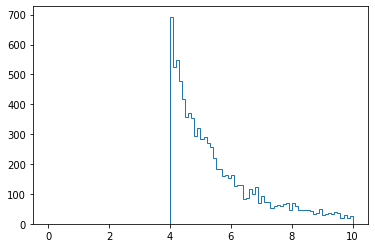

In [33]:
plt.Figure()
plt.hist(arrs[b'trk_pt'].flatten()*1e-3, histtype='step', bins=100, range=(0, 10))
plt.show()

In [22]:
print(arrs[b'AK4EM_BTagTrackToJetAssociator_jet_trackAssoc_index'][0][0])
print(arrs[b'AK4EM_IP3D_jet_ipxd_ntrk'][0][0])
print(arrs[b'AK4EM_IP3D_jet_ipxd_trackAssoc_index'][0][0])
print(arrs[b'trk_d0_atpv'][0][6], arrs[b'trk_d0_atpv'][0][25])
print(arrs[b'AK4EM_IP3D_jet_ipxd_valD0wrtPVofTracks'][0][0])

[6, 25]
2
[6, 25]
-0.5254664 -0.057207648
[0.5254664, -0.057207648]


AssertionError: 

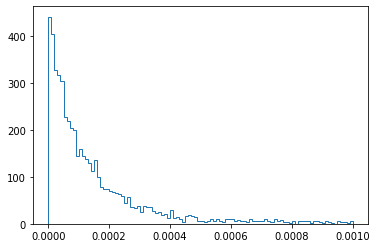

In [10]:
plt.Figure()
plt.hist(arrs[b'trk_d0_atpv'].flatten()*1e-3, histtype='step', bins=100, range=(0, 0.001))
plt.hist(arrs[b'AK4EM_IP3D_jet_ipxd_valD0wrtPVofTracks'].flatten()*1e-3, histtype='step', bins=100, range=(0, 0.001))
plt.show()

In [28]:
for iet in range(f["bTag"].numentries):
    print('njets', len(arrs[b'AK4EM_jet_pt'][iet]))
    for ij in range(len(arrs[b'AK4EM_jet_pt'][iet])):
        print('jet', ij, 'pt', arrs[b'AK4EM_jet_pt'][iet][ij])
        print('jet', ij, 'track asso', arrs[b'AK4EM_IP3D_jet_ipxd_trackAssoc_index'][iet][ij])
        print('jet', ij, 'track asso', arrs[b'AK4EM_BTagTrackToJetAssociator_jet_trackAssoc_index'][iet][ij])
        print('jet', ij, 'track asso', arrs[b'AK4EM_BTagTrackToJetAssociatorBB_jet_trackAssoc_index'][iet][ij])
        for itrk in arrs[b'AK4EM_BTagTrackToJetAssociator_jet_trackAssoc_index'][iet][ij]:
            print('\t', 'itrk', itrk, arrs[b'trk_pt'][iet][itrk])
    break

njets 96
jet 0 pt 57305.33
jet 0 track asso [6, 25]
jet 0 track asso [6, 25]
jet 0 track asso [6, 25]
	 itrk 6 7024.663
	 itrk 25 9914.576
jet 1 pt 52578.203
jet 1 track asso [0, 4]
jet 1 track asso [0, 4]
jet 1 track asso [0, 4]
	 itrk 0 21666.576
	 itrk 4 120247.62
jet 2 pt 47966.258
jet 2 track asso [31, 40]
jet 2 track asso [28, 30, 31, 40]
jet 2 track asso [28, 30, 31, 40]
	 itrk 28 8248.365
	 itrk 30 4367.4883
	 itrk 31 6590.959
	 itrk 40 5054.564
jet 3 pt 31629.799
jet 3 track asso []
jet 3 track asso []
jet 3 track asso []
jet 4 pt 22052.799
jet 4 track asso [14, 20]
jet 4 track asso [13, 14, 16, 20]
jet 4 track asso [13, 14, 16, 20]
	 itrk 13 5948.56
	 itrk 14 9416.431
	 itrk 16 6167.69
	 itrk 20 4514.309
jet 5 pt 19286.482
jet 5 track asso []
jet 5 track asso []
jet 5 track asso []
jet 6 pt 19069.56
jet 6 track asso []
jet 6 track asso []
jet 6 track asso [2]
jet 7 pt 18251.014
jet 7 track asso []
jet 7 track asso [11]
jet 7 track asso [11]
	 itrk 11 4099.0913
jet 8 pt 16430.

In [17]:
print(arrs[b'AK4EM_BTagTrackToJetAssociator_jet_trackAssoc_index'])

[[[6, 25], [0, 4], [28, 30, 31, 40], [], [13, 14, 16, 20], [], [], [11], [], [], [], [], [19], [], [21, 23], [17], [], [], [], [], [], [], [15], [7, 22], [], [], [], [], [9], [], [3, 5, 39], [], [], [33], [], [], [], [], [], [35], [], [], [], [], [], [], [], [], [], [], [], [], [36], [38], [], [], [], [], [29], [], [24], [27], [], [], [26], [], [], [32], [], [], [], [37], [], [], [], [], [], [], [], [], [], [], [8, 10], [], [], [], [], [], [], [], [], [], [], [], [], []] [[4, 5, 10, 11, 12, 13, 21, 22, 31, 49, 52], [25, 33, 36, 41, 50, 51], [1, 2, 42], [27, 28, 32, 38, 44], [3], [23, 34, 35, 47, 57], [], [16, 19, 53], [], [], [17], [], [], [], [], [], [7, 8], [], [15], [], [], [14], [], [], [], [], [], [], [], [], [20], [], [], [], [], [], [], [], [], [18], [], [], [0, 6, 43], [], [], [], [], [45], [], [], [], [39], [], [], [], [], [], [], [], [26], [56], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [24], [54], [], [], [], [], [], [], 